In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
if not os.path.exists('img/ch-1'):
    os.makedirs('img/ch-1', exist_ok=True)

In [2]:
a = [1, 1/4, 1/9, 1/16] 

In [3]:
print(a[0])

1


In [4]:
def a(n: int) -> float: 
  return 1 / n**2

In [5]:
print(a(2))

0.25


In [6]:
def a(n): 
  return 1 / n**2

In [7]:
a = lambda n: 1 / n**2

In [8]:
def a(n: int) -> float:
  if n % 2 == 1:
    return 1 / n**2
  else:
    return -1 / n**2

In [9]:
a = lambda n: 1 / n**2 if n % 2 == 1 else -1 / n**2

In [10]:
def a(n: int) -> float:
  term = 1
  for i in range(n):
    term *= (2*(n-i)+1)/(2*(n-i)+2)
  return term

In [11]:
print(a(10**6))

0.001128378461859233


In [12]:
def a(n: int) -> float:
    term = 1
    for i in range(n+1):
        term /= 4
    for i in range(2*n+2):
        term *= i+1
    for i in range(n+1):
        term /= (i+1)**2
    return term

In [13]:
print(a(10))
print(a(10**2))
print(a(10**3))

0.16818809509277344
inf
0.0


In [10]:
def sqrt_decmial(n: int) -> float:
    sqrt = 1
    for i in range(n):
        temp, inc = sqrt, 1 / 10 ** (i + 1)
        for _ in range(10):
            if 2 < (temp + inc) ** 2:
                break
            temp += inc
        sqrt = temp
    return round(sqrt, n)

In [11]:
print(sqrt_decmial(6))

1.414213


In [15]:
def nth_prime(n: int) -> float:
    prime_list = [2]
    for _ in range(2, n+1):
        prime = False
        p = prime_list[-1] + 1
        while not prime:
            for i in prime_list:
                if p % i == 0:
                    p += 1
                    break
            else:
                prime = True
        prime_list.append(p)
    return prime_list[-1]

In [11]:
def fibonacci(n: int) -> int:
    if n < 0: return 0
    if 0 <= n <= 1: return n
    a, b = 1, 1
    for i in range(n-1):
        a, b = b, a+b
    return a

fibonacci(4)

3

In [17]:
def fibonacci_recr(n: int) -> int:
    if n < 0: return 0
    if 0 <= n <= 1: return n
    return fibonacci_recr(n-1) + fibonacci_recr(n-2)

In [18]:
def sqrt(n: int) -> float:
    term = 1
    for _ in range(n):
        term = (term + 2/term)/2
    return term

In [19]:
a = lambda n: (1 + 1/n)**n
print([f'%.3f'%a(n) for n in range(1, 21)])

['2.000', '2.250', '2.370', '2.441', '2.488', '2.522', '2.546', '2.566', '2.581', '2.594', '2.604', '2.613', '2.621', '2.627', '2.633', '2.638', '2.642', '2.646', '2.650', '2.653']


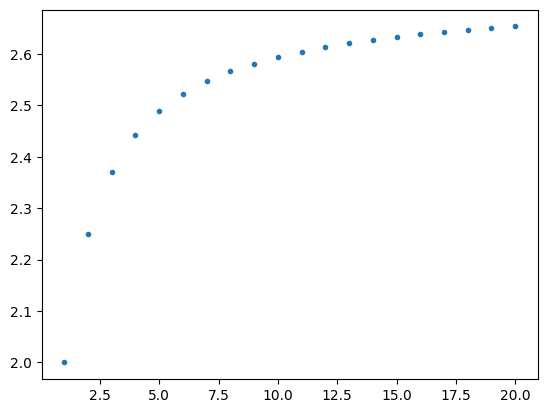

In [ ]:
import matplotlib.pyplot as plt

a = lambda n: (1 + 1/n)**n
x = range(1, 21)
y = [a(n) for n in x]
plt.plot(x, y, '.')
plt.savefig('img/ch-1/1-1-2.png', dpi=600, bbox_inches='tight')

In [13]:
!pip install pyqt5

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.6 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.co

In [14]:
%matplotlib qt

In [23]:
%matplotlib inline

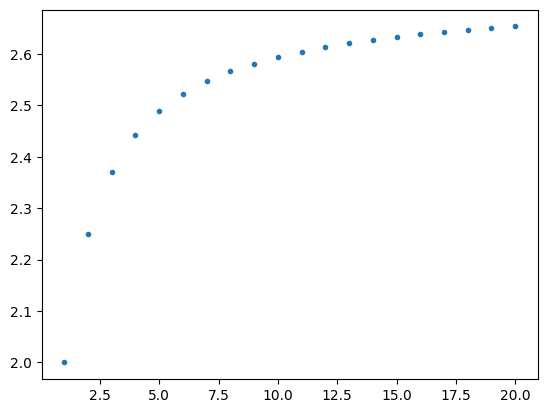

In [24]:
import matplotlib.pyplot as plt

a = lambda n: (1 + 1/n)**n
x = range(1, 21)
y = [a(n) for n in x]
plt.plot(x, y, '.')
plt.show()

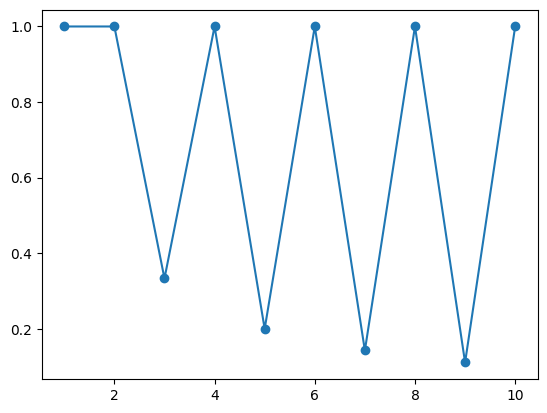

In [ ]:
import matplotlib.pyplot as plt

a = lambda n: 1 if n % 2 == 0 else 1/n
x = range(1, 11)
y = [a(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-1-3.png', dpi=600, bbox_inches='tight')

In [26]:
def a(n: int) -> float:
    term = 2
    for _ in range(n): term = 2/3*term + 2/3/term**2
    return term

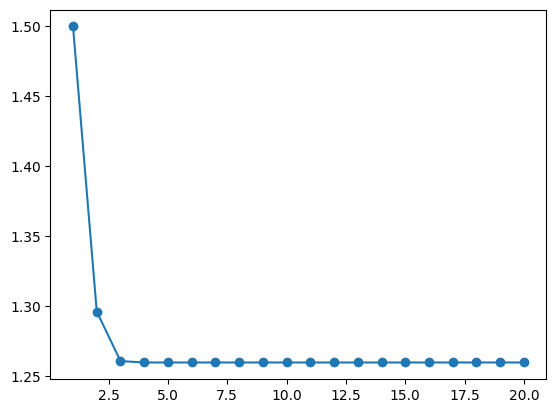

In [ ]:
x = range(1, 21)
y = [a(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-1-4.png', dpi=600, bbox_inches='tight')

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def sqrt_seq(n) -> float:
    s = 1 
    while n > 0:
        s = (s + 2/s) / 2
        n -= 1
    return s

x = np.linspace(.75, 1.6)
y = (x + 2/x) / 2
plt.plot(x, y, 'k')
plt.plot(x, x, 'k')

x = 1
y = (x + 2/x) / 2
plt.plot([x, x], [0, y], '--', color='C0')
plt.plot([x, y], [y, y], '--', color='C0')
plt.text(x+.005, 1.305, r'$a_1$', fontsize=15, usetex=True)
plt.plot(x, y, '.k', markersize=10)
plt.text(x+.005, y+0.005, r'$A_1$', fontsize=15, usetex=True)
plt.plot(y, y, '.k', markersize=10)
plt.text(y+.015, y+0.005, r'$A^\prime_1$', fontsize=15, usetex=True)
x = y

plt.plot([x, x], [0, y], '--', color='C0')
y = (x + 2/x) / 2
plt.plot([x, y], [y, y], '--', color='C0')
plt.plot(x, y, '.k', markersize=10)
plt.text(x+.005, y+0.01, r'$A_2$', fontsize=15, usetex=True)
plt.text(x+.005, 1.305, r'$a_2$', fontsize=15, usetex=True)
x = y

plt.plot([x, x], [0, y], '--', color='C0')
y = (x + 2/x) / 2
plt.plot([x, y], [y, y], '--', color='C0')
plt.text(x+.005, 1.305, r'$a_3$', fontsize=15, usetex=True)

plt.text(1.33, 1.35, r'$y = x$', fontsize=15, usetex=True, ha='right')
plt.text(.95, 1.55, r'$y = \frac{1}{2}\left(x + \frac{2}{x}\right)$', fontsize=15, usetex=True, ha='left')
plt.xlim(0.75, 1.6)
plt.ylim(1.3, 1.6)

plt.savefig('img/ch-1/1-1-5.png', dpi=600, bbox_inches='tight')

In [28]:
def harmonic(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += 1/i
    return sum

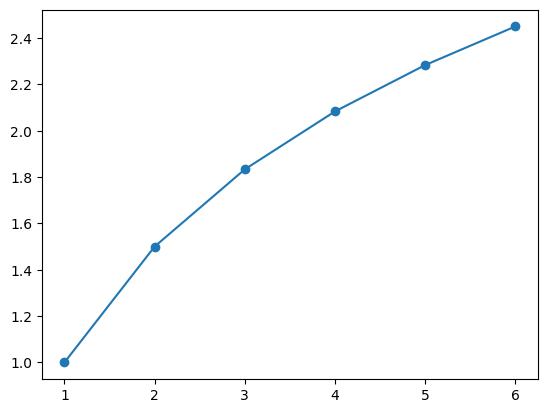

In [29]:
x = range(1, 7)
y = [harmonic(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-2-1-1.png', dpi=600, bbox_inches='tight')

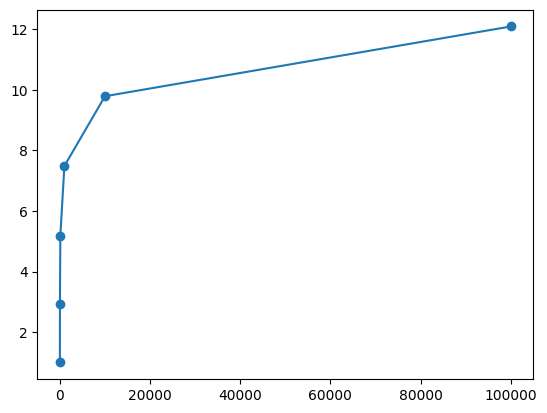

In [30]:
x = [10**i for i in range(6)]
y = [harmonic(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-2-1-2.png', dpi=600, bbox_inches='tight')

In [31]:
def s(n: int) -> float:
    sum = 0
    for i in range(1, n+1): sum += 1/i**2
    return sum

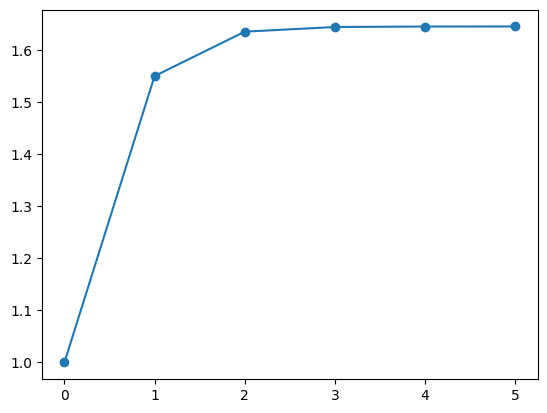

In [32]:
x = range(6)
y = [s(10**n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-2-1-3.png', dpi=600, bbox_inches='tight')

In [33]:
def s(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        if i % 2:
            sum += 1 / i
        else:
            sum += -1 / i
    return sum

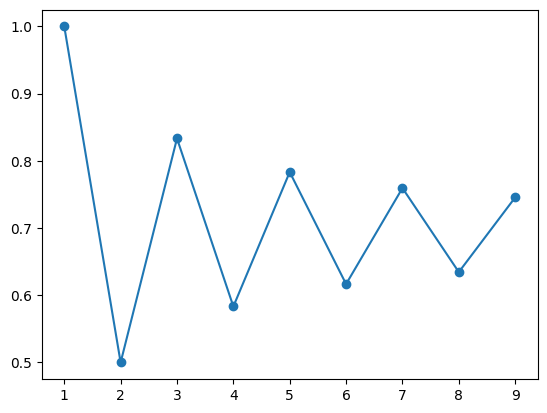

In [34]:
x = range(1, 10)
y = [s(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-2-2-1.png', dpi=600, bbox_inches='tight')

In [35]:
print([f'%.5f'%s(10**n) for n in range(8)])

['1.00000', '0.64563', '0.68817', '0.69265', '0.69310', '0.69314', '0.69315', '0.69315']


In [36]:
def s(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        if i % 2: sum += 1 / i**2
        else: sum += -1 / i**2
    return sum

In [37]:
print([f'%.4f'%s(10**n) for n in range(1,8)])

['0.8180', '0.8224', '0.8225', '0.8225', '0.8225', '0.8225', '0.8225']


In [38]:
def s(n: int) -> float:
    odd, iter, sum = 1, 1, 0
    while True:
        for _ in range(iter):
            sum += 1/(odd)
            odd += 2
            n -= 1
            if n == 0:
                return sum
        sum -= 1/(2*iter)
        n -= 1
        if n == 0:
            return sum
        iter += 1

In [39]:
print([f'%.4f'%s(10**n) for n in range(1, 7)])

['1.0385', '1.6688', '2.2387', '2.8223', '3.3978', '3.9736']


In [40]:
def s(n: int) -> float:
    odd, iter, sum = 1, 1, 0
    while True:
        for _ in range(iter):
            sum += 1 / odd**2
            odd += 2
            n -= 1
            if n == 0:
                return sum
        sum -= 1 / (2*iter)**2
        n -= 1
        if n == 0:
            return sum
        iter += 1

In [41]:
print([f'%.4f'%s(10**n) for n in range(1, 8)])

['0.8578', '0.8396', '0.8280', '0.8242', '0.8230', '0.8226', '0.8225']


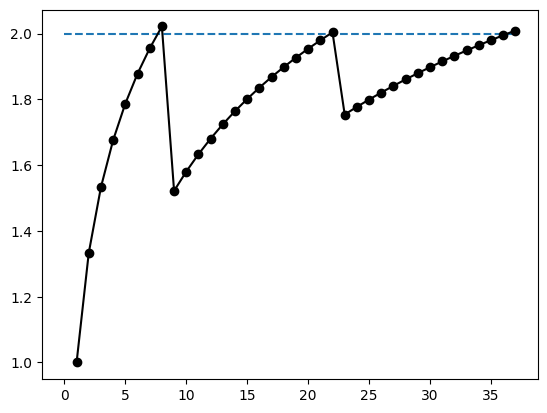

In [42]:
import matplotlib.pyplot as plt

a, b = 1, 1
x, y = [], []
sum, n = 0, 0
for i in range(5):
    if i%2 == 0:
        while sum <= 2:
            sum += 1/(2*a-1)
            y.append(sum)
            a += 1
            n += 1
    else:
        while sum >= 2:
            sum -= 1/(2*b)
            y.append(sum)
            b += 1
            n += 1
plt.plot([0, n], [2, 2], '--')
plt.plot(range(1, n+1), y, 'o-k')

plt.savefig('img/ch-1/1-2-2-2.png', dpi=600, bbox_inches='tight') 

In [43]:
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += (1/2)**(i/2)
    return sum

In [44]:
print([f'%.4f'%s1(10**n) for n in range(1, 6)])

['2.3388', '2.4142', '2.4142', '2.4142', '2.4142']


In [45]:
def s2(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += (1/(2*i))**(1/2)
    return sum

In [46]:
print([f'%.4f'%s2(10**n) for n in range(1, 6)])

['3.5504', '13.1448', '43.6999', '140.3923', '446.1821']


In [21]:
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        term = 1
        for j in range(1, i+1):
            term *= j**2/(2*j)/(2*j-1)
        sum += term
    return sum

In [22]:
def s2(n: int) -> float:
    sum = 0
    for i in range(n):
        sum += (1/4)**i
    return sum/2

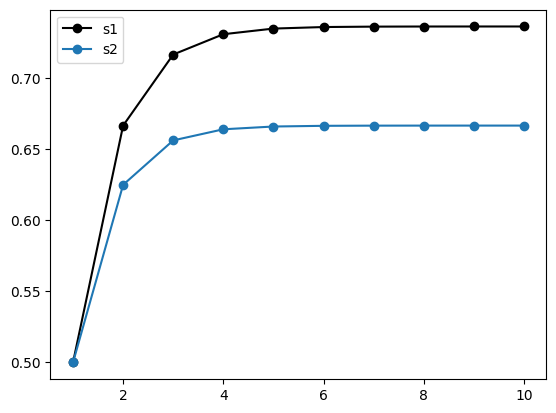

In [23]:
import matplotlib.pyplot as plt
x = range(1, 11)
y1 = [s1(n) for n in x]
y2 = [s2(n) for n in x]
plt.plot(x, y1, 'ko-', label='s1')
plt.plot(x, y2, 'o-', label='s2')
plt.legend()

plt.savefig('img/ch-1/1-2-2-3.png', dpi=600, bbox_inches='tight')

In [50]:
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += (1 + 1/i)**(i**2)
    return sum

In [51]:
e = (1+1/1e10)**1e10
def s2(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += e**i
    return sum

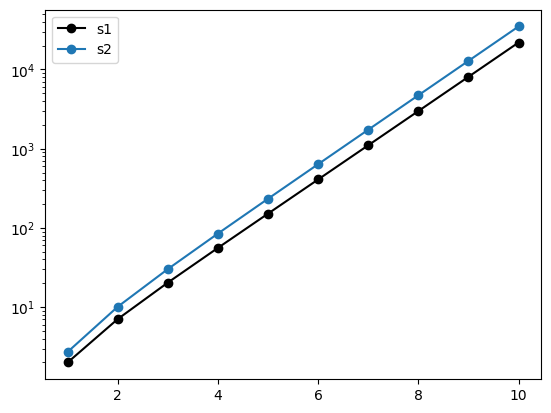

In [52]:
x = range(1, 11)
y1 = [s1(n) for n in x]
y2 = [s2(n) for n in x]
plt.plot(x, y1, 'ko-', label='s1')
plt.plot(x, y2, 'o-', label='s2')
plt.legend()
plt.yscale('log')

plt.savefig('img/ch-1/1-2-2-4.png', dpi=600, bbox_inches='tight')

In [53]:
a = lambda n: (1-1/n)**n
print(a(10**6))

0.36787925722106646


In [54]:
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += 1/(i**2-i-1)
    return sum

In [55]:
def s2(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += 1/i**2
    return sum

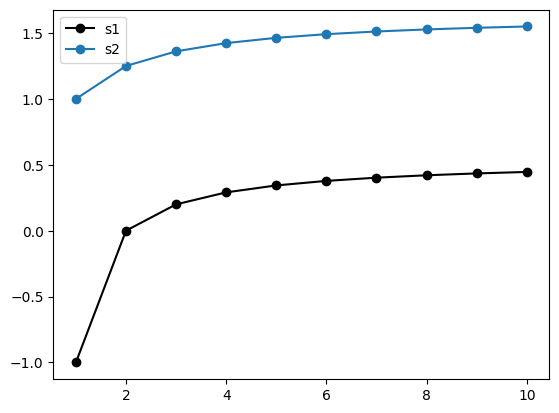

In [56]:
x = range(1, 11)
y1 = [s1(n) for n in x]
y2 = [s2(n) for n in x]
plt.plot(x, y1, 'ko-', label='s1')
plt.plot(x, y2, 'o-', label='s2')
plt.legend()

plt.savefig('img/ch-1/1-2-2-5.png', dpi=600, bbox_inches='tight')

In [24]:
def a(x: float) -> float:
    eps = 1e-15
    if x <= -1 or 3 <= x:
        return float('nan')
    sum, term = 0, 1
    while not -eps < term < eps:
        sum += term
        term *= (x-1)/2
    return sum 

import matplotlib.pyplot as plt

x = [-.95 + .05*i for i in range(int(4/.05))]
y = [a(t) for t in x]
plt.plot(x, y)
plt.savefig('img/ch-1/1-2-3-1.png', dpi=600, bbox_inches='tight')

In [58]:
def exp(x: float) -> float:
    for _ in range(30): x /= 2
    x += 1
    for _ in range(30): x *= x
    return x

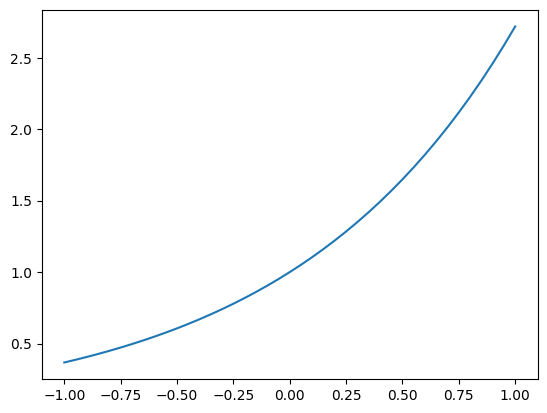

In [59]:
x = [-1 + .05*i for i in range(int(2/.05)+1)]
y = [exp(t) for t in x]
plt.plot(x, y)

plt.savefig('img/ch-1/1-3-1-1.png', dpi=600, bbox_inches='tight')

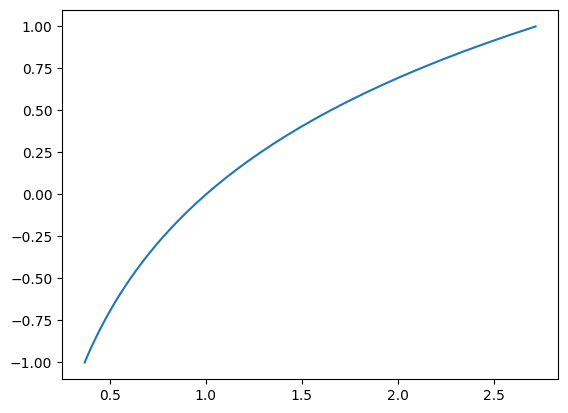

In [60]:
x = [-1 + .05*i for i in range(int(2/.05)+1)]
y = [exp(t) for t in x]
plt.plot(y, x)
plt.savefig('img/ch-1/1-3-1-2.png', dpi=600, bbox_inches='tight')

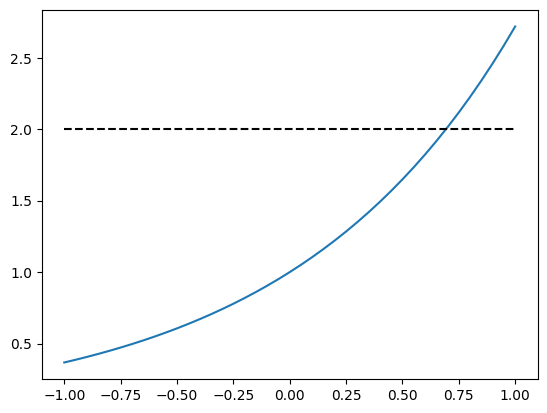

In [61]:
x = [-1 + .05*i for i in range(int(2/.05)+1)]
y = [exp(t) for t in x]
plt.plot(x, y)
plt.plot([-1., 1.], [2., 2.], 'k--')
plt.savefig('img/ch-1/1-3-1-3.png', dpi=600, bbox_inches='tight')


In [62]:
def log(x: float) -> float:
    if x <= 0:
        return float('nan')
    n = 1
    while not (exp(-n) <= x <= exp(n)): n += 1
    a, b, c = -n, n, 0
    while not (a == c or b == c):
        if exp(c) >= x: b = c
        else:           a = c
        c = (b+a)/2
    return c

In [63]:
pi = 3.141592653589793

def cos(x):
    while x <= -pi:
        x += 2*pi
    while x >= pi:
        x -= 2*pi  
    sum, term, i = 1, 1, 1
    while term != 0:
        term *= x*x/(2*i)/(2*i-1)
        if i%2 == 0: sum += term
        else:        sum -= term
        i += 1
    return sum

In [64]:
def sin(x):
    while x <= -pi:
        x += 2*pi
    while x >= pi:
        x -= 2*pi        
    sum, term, i = x, x, 1
    while term != 0:
        term *= x*x/(2*i+1)/(2*i)
        if i%2 == 0: sum += term
        else:        sum -= term
        i += 1
    return sum

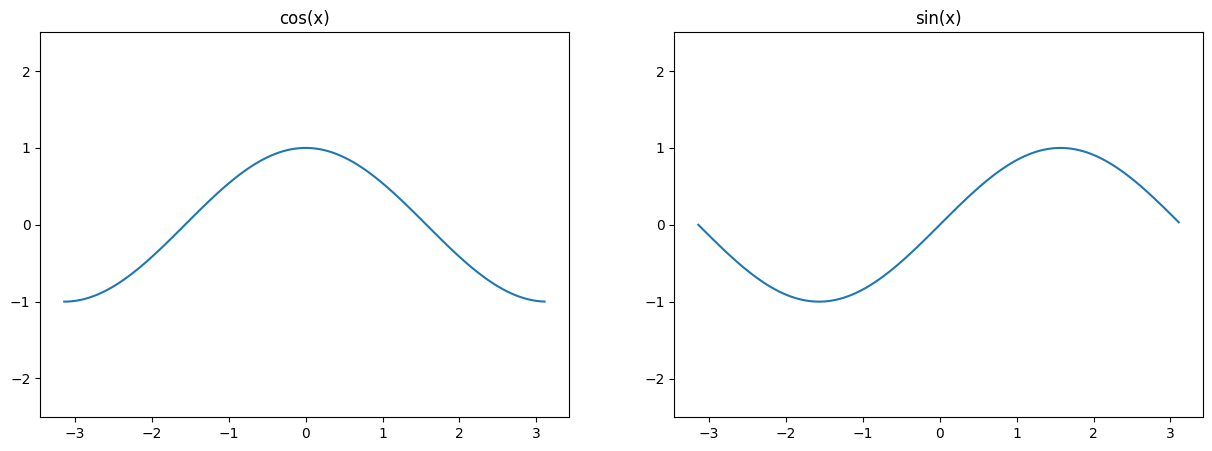

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
x = [-pi + .05*i for i in range(int(2*pi/.05)+1)]
y1 = [cos(t) for t in x]
y2 = [sin(t) for t in x]
ax[0].plot(x, y1)
ax[1].plot(x, y2)
ax[0].set_title('cos(x)')
ax[1].set_title('sin(x)')
ax[0].axis('equal')
ax[1].axis('equal')
plt.savefig('img/ch-1/1-3-2-1.png', dpi=600, bbox_inches='tight')


In [66]:
basic_func = {
    'sqrt': sqrt, 
    'exp': exp, 
    'log': log, 
    'sin': sin, 
    'cos': cos,
}

In [67]:
add = lambda x, y: x + y
subs = lambda x, y: x - y
mul = lambda x, y: x * y
div = lambda x, y: x / y

In [68]:
arithmetic = {
    '+': add,
    '-': subs,
    '*': mul,
    '/': div,
}

In [69]:
val = 0.0

while 1:
    expr = input("> ")
    try:
        val = float(expr)
    except ValueError:
        if expr == 'exit':
            break
        for name, func in basic_func.items():
            if expr == name:
                val = func(val)
        for name, func in arithmetic.items():
            if expr == name:
                new = input("> ")
                try:
                    val = func(val, float(new))
                except ValueError:
                    pass
    print(val)

0.0
0.0
0.0
0.0


코드없이 삽입된 그림

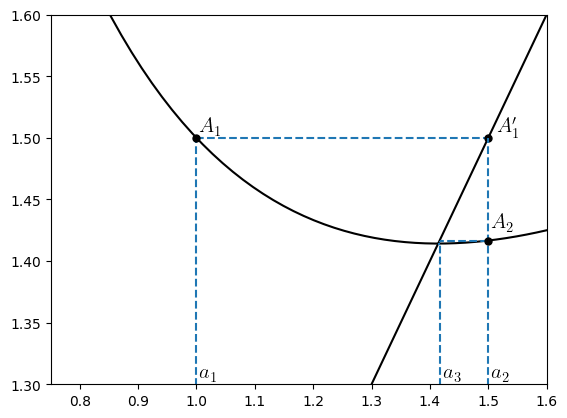

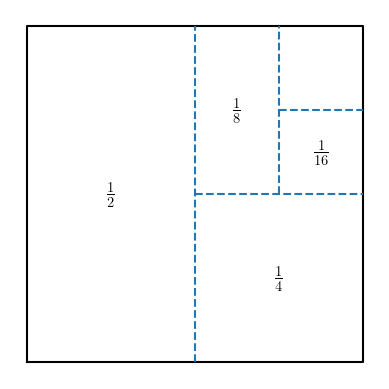

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 1, 0]
x.append(x[0])
y = [0, 0, 1, 1]
y.append(y[0])
plt.plot(x, y, 'k')

text_option = {
    'fontsize': 15,
    'usetex': True,
    'horizontalalignment': 'center',
    'verticalalignment':'center',
}

x = [.5, .5]
y = [0, 1]
plt.plot(x, y, '--', color='C0')
plt.text(1/4, 1/2, r'$\frac{1}{2}$', **text_option)

x = [.5, 1]
y = [.5, .5]
plt.plot(x, y, '--', color='C0')
plt.text(3/4, 1/4, r'$\frac{1}{4}$', **text_option)

x = [3/4, 3/4]
y = [.5, 1]
plt.plot(x, y, '--', color='C0')
plt.text(5/8, 3/4, r'$\frac{1}{8}$', **text_option)

x = [3/4, 1]
y = [3/4, 3/4]
plt.plot(x, y, '--', color='C0')
plt.text(7/8, 5/8, r'$\frac{1}{16}$', **text_option)

plt.gca().set_aspect('equal')
plt.axis('off')

plt.savefig('img/ch-1/ex-2.png', dpi=600, bbox_inches='tight')

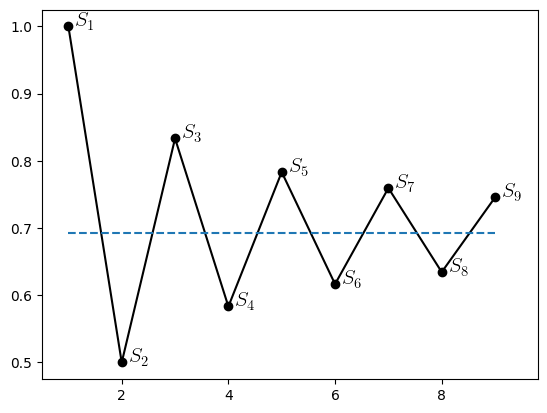

In [72]:
import matplotlib.pyplot as plt

def sum(n):
    s = 0
    for i in range(1, n+1):
        if i % 2:
            s += 1 / i
        else:
            s += -1 / i
    return s

n = 9
x = [i+1 for i in range(n)]
y = [sum(i+1) for i in range(n)]
plt.plot(x, y, 'o-k')
lim = sum(10**4)
plt.plot([1, n], [lim, lim], '--', color='C0')

for i in range(n):
    plt.text(i+1+.15, sum(i+1), r'$S_ii$'.replace('ii', '%d'% (i+1)), usetex=True, fontsize=15)
plt.xlim(.5, 9.8)

plt.savefig('img/ch-1/ex-3.png', dpi=600, bbox_inches='tight')

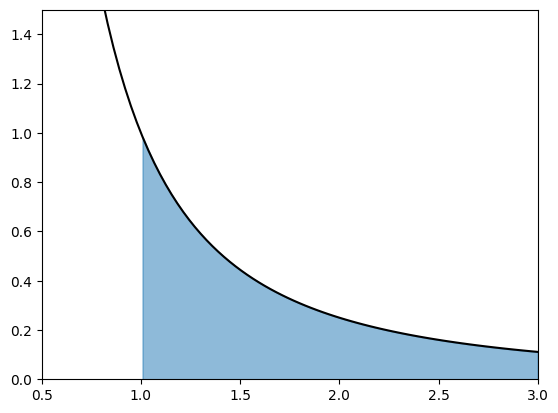

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# plt.figure(figsize=plt.figaspect(1))
plt.xlim(.5, 3)
plt.ylim(0, 1.5)

x = np.linspace(.1, 3, 100)
plt.plot(x, 1/x**2, 'k')
plt.fill_between(x, 1/x**2, where=(1 < x) & (x <= 4), color='C0', alpha=.5)

plt.savefig('img/ch-1/ex-4.png', dpi=600, bbox_inches='tight')

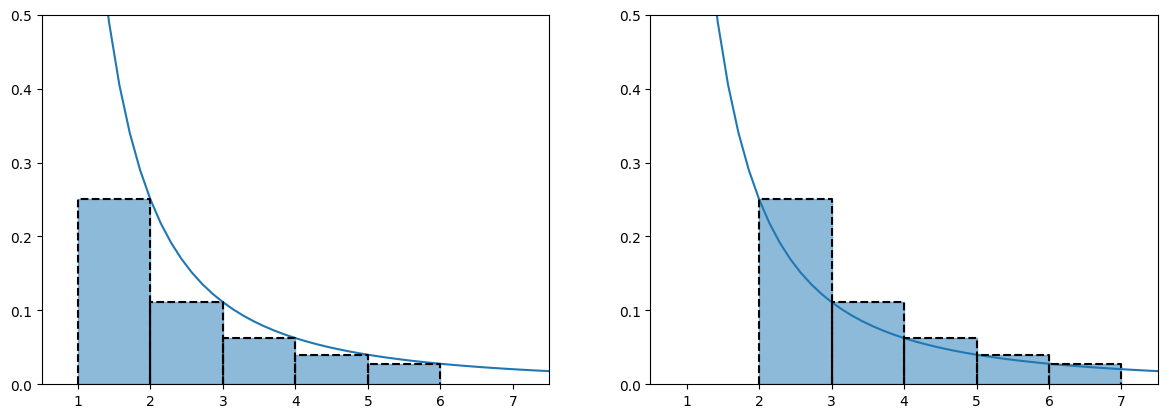

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import math

f = lambda x: 1/x**2

fig = plt.figure(figsize=plt.figaspect(1/3))
ax = fig.add_subplot(121)
num_rect = 5
x = np.linspace(1, 3+num_rect)
plt.plot(x, f(x))
for i in range(2, 2+num_rect):
    ax.plot([i-1, i-1, i, i], [0, f(i), f(i), 0], 'k--')
    ax.fill_between([i-1, i], [f(i), f(i)], color='C0', alpha=.5)
ax.set_xlim([0.5, 2.5+num_rect])
ax.set_ylim([0, .5])

ax = fig.add_subplot(122)
x = np.linspace(1, 3+num_rect)
plt.plot(x, f(x))
for i in range(2, 2+num_rect):
    ax.plot([i, i, i+1, i+1], [0, f(i), f(i), 0], 'k--')
    ax.fill_between([i, i+1], [f(i), f(i)], color='C0', alpha=.5)
ax.set_xlim([0.5, 2.5+num_rect])
ax.set_ylim([0, .5])

plt.savefig('img/ch-1/ex-5.png', dpi=600, bbox_inches='tight')

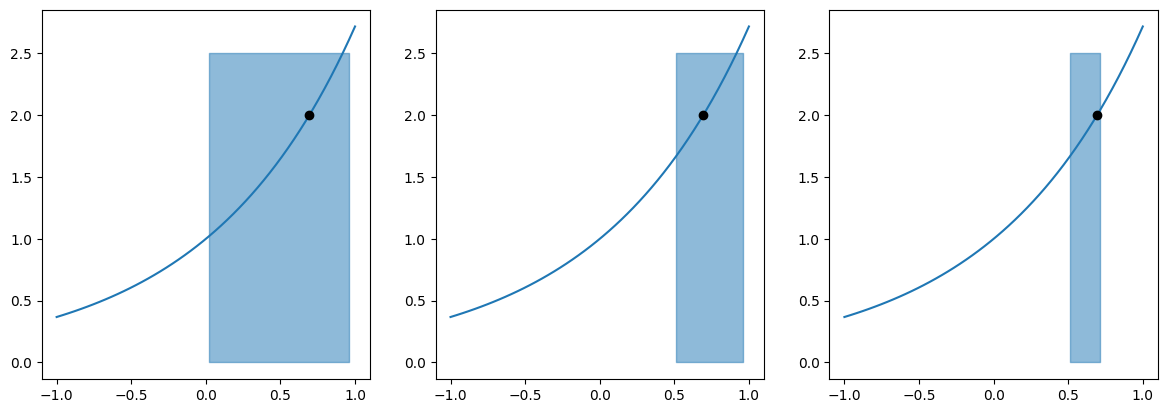

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=plt.figaspect(1/3))
ax = fig.add_subplot(131)
x = np.linspace(-1, 1)
plt.plot(x, np.exp(x))
plt.plot(np.log(2), 2, 'ko')
plt.fill_between(x, 2.5, where=(x > 0)&(x < 1), color='C0', alpha=.5)

ax = fig.add_subplot(132)
x = np.linspace(-1, 1)
plt.plot(x, np.exp(x))
plt.plot(np.log(2), 2, 'ko')
plt.fill_between(x, 2.5, where=(x > .5)&(x < 1), color='C0', alpha=.5)

ax = fig.add_subplot(133)
x = np.linspace(-1, 1)
plt.plot(x, np.exp(x))
plt.plot(np.log(2), 2, 'ko')
plt.fill_between(x, 2.5, where=(x > .5)&(x < .75), color='C0', alpha=.5)

plt.savefig('img/ch-1/ex-6.png', dpi=600, bbox_inches='tight')

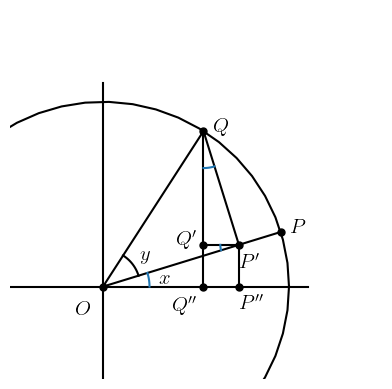

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=plt.figaspect(1))
t = np.linspace(0, 2*np.pi)
plt.plot(np.cos(t), np.sin(t), 'k')

plt.plot([-1.1, 1.1], [0, 0], '-k')
plt.plot([0, 0], [-1.1, 1.1], '-k')

p = np.array([np.cos(.3), np.sin(.3)])
q = np.array([np.cos(1), np.sin(1)])

text_op = {
    'usetex': True,
    'fontsize': 15,
}

# 점과 선분그리기
plt.plot([0, p[0]], [0, p[1]], '-k')
plt.plot([0, q[0]], [0, q[1]], '-k')
plt.plot(p[0], p[1], '.k', markersize=10)
plt.plot(q[0], q[1], '.k', markersize=10)
plt.plot(0, 0, '.k', markersize=10)
plt.text(p[0]+.05, p[1], r'$P$', **text_op)
plt.text(q[0]+.05, q[1], r'$Q$', **text_op)
plt.text(-.15, -.15, r'$O$', **text_op)

# 각도 표시
t = np.linspace(.3, 1)
plt.plot(.2*np.cos(t), .2*np.sin(t), 'k')
t = np.linspace(0, .3)
plt.plot(.25*np.cos(t), .25*np.sin(t))
plt.text(.3, .02, r'$x$', **text_op)
plt.text(.2, .15, r'$y$', **text_op)

# 보조선 그리기
plt.plot([q[0], q[0]], [q[1], 0], 'k')
plt.plot([q[0], np.cos(.7)*p[0]], [q[1], np.cos(.7)*p[1]], 'k')
plt.plot(np.cos(.7)*p[0], np.cos(.7)*p[1], '.k', markersize=10)
plt.text(np.cos(.7)*p[0], np.cos(.7)*p[1]-.12, r'$P^\prime$', **text_op)
plt.plot([np.cos(.7)*p[0], np.cos(.7)*p[0]], [np.cos(.7)*p[1], 0], 'k')
plt.plot(np.cos(.7)*p[0], 0, '.k', markersize=10)
plt.text(np.cos(.7)*p[0], -.12, r'$P^{\prime\prime}$', **text_op)

plt.plot([np.cos(.7)*p[0], q[0]], [np.cos(.7)*p[1], np.cos(.7)*p[1]], 'k')
plt.plot(q[0],  np.cos(.7)*p[1], '.k', markersize=10)
plt.text(q[0]-.15,  np.cos(.7)*p[1], r'$Q^\prime$', **text_op)
plt.plot(q[0],  0, '.k', markersize=10)
plt.text(q[0]-.17,  -.13, r'$Q^{\prime\prime}$', **text_op)
# plt.plot(1, 0, '.k', markersize=10)
# plt.text(1.05, -.13, r'$A$', **text_op)

t = np.linspace(0, .3)
plt.plot(np.cos(.7)*p[0] + .1*np.cos(np.pi + t), np.cos(.7)*p[1]+ .1*np.sin(np.pi + t), color='C0')
plt.plot(q[0] + .2*np.cos(3*np.pi/2 + t), q[1]+ .2*np.sin(3*np.pi/2 + t), color='C0')

plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)
plt.axis('off')

plt.savefig('img/ch-1/ex-7.png', dpi=600, bbox_inches='tight')